In [54]:
from functools import lru_cache
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from scipy.constants import golden
import scipy.linalg as lin
import sympy as sp
from sympy.matrices import hessian

In [7]:
sp.init_printing()
%matplotlib inline
plt.style.use("seaborn")
plt.rc('figure', figsize=(10, 10))

In [10]:
x, y = sp.symbols('x y')

# Task 1
## Function

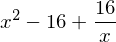

In [11]:
f_ = x**2 + 16/x - 16
f_

## Derivative

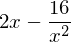

In [12]:
f = sp.lambdify(x, f_, np)
df = sp.lambdify(x, f_.diff(), np)
f_.diff()

## Graph

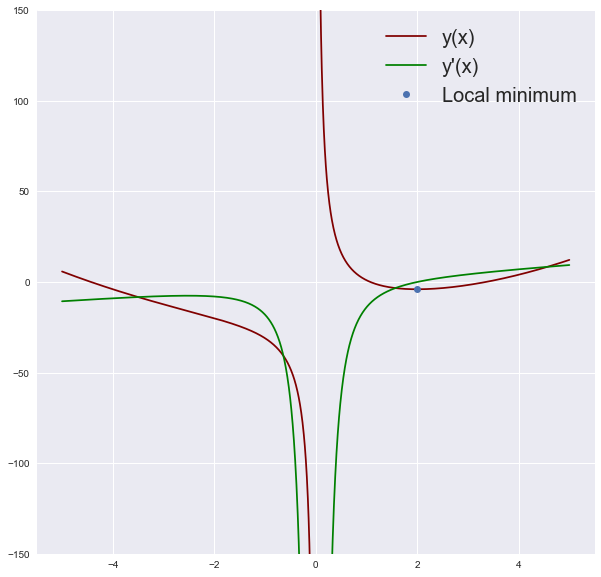

In [14]:
A = -5
B = 5

X1 = np.linspace(A, -0.01, 1000)
X2 = np.linspace(0.01, B, 1000)

plt.plot(X1, f(X1), label="y(x)", c='maroon')
plt.plot(X2, f(X2), c='maroon')
plt.plot(X1, df(X1), label="y'(x)", c='green')
plt.plot(X2, df(X2), c='green')
plt.plot(2, -4, 'o', label="Local minimum")

plt.ylim([-150, 150])
plt.legend(fontsize=20)

plt.show()

## Golden-section search

In [17]:
def golden_section_search(f, a, b, tol=1e-4):
    """Return the minimum point and minimum 
    of the function on the segment [a, b]
    using golden section search
    """
    # number of iterations to achieve given accuracy
    N = int(math.log(tol / (b-a), golden-1)) + 1 
    for i in range(N):
        t = (b-a) / golden
        x1, x2 = b-t, a+t
        if f(x1) > f(x2):
            a = x1
        else:
            b = x2
    x = (a+b) / 2
    return N, x, f(x)

### Minimum

In [18]:
niter, xmin, fmin = golden_section_search(f, A, B)
print(f"Number of iterations: {niter}")
print(f"Minimum point: {xmin}")
print(f"Minimum: {fmin}")

Number of iterations: 24
Minimum point: -3.456978626970031e-16
Minimum: -4.628319039977308e+16


### Local minimum

In [19]:
niter, xmin, fmin = golden_section_search(f, 0, 4)
print(f"Number of iterations: {niter}")
print(f"Minimum point: {xmin}")
print(f"Minimum: {fmin}")

Number of iterations: 23
Minimum point: 2.000011921721973
Minimum: -3.99999999957362


## Fibonacci search

In [20]:
def fibonacci_search(f, a, b, n=50):
    """Return the minimum point and minimum 
    of the function on the segment [a, b]
    using Fibonacci search
    """
    F = fibonacci
    for i in range(n, 1, -1):
        t = (b-a) / F(i)
        x1 = a + t*F(i - 2)
        x2 = a + t*F(i - 1)
        if f(x1) > f(x2):
            a, x1 = x1, x2
        else:
            b, x2 = x2, x1
    F.cache_clear()
    x = (a+b) / 2
    return n, x, f(x)

@lru_cache(256)
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

### Minimum

In [21]:
niter, xmin, fmin = fibonacci_search(f, A, B)
print(f"Number of iterations: {niter}")
print(f"Minimum point: {xmin}")
print(f"Minimum: {fmin}")

Number of iterations: 50
Minimum point: -7.945169745347821e-10
Minimum: -20138021622.61019


### Local minimum

In [22]:
niter, xmin, fmin = fibonacci_search(f, 0, 3)
print(f"Number of iterations: {niter}")
print(f"Minimum point: {xmin}")
print(f"Minimum: {fmin}")

Number of iterations: 50
Minimum point: 1.99999999829179
Minimum: -4.0


# Task 2
## Function

In [23]:
f2_ = sp.exp(-x**2) + 0.01*sp.cos(200*x)
f2 = sp.lambdify(x, f2_, np)
df2 = sp.lambdify(x, f2_.diff(), np)
d2f2 = sp.lambdify(x, f2_.diff(x, 2), np)
f2_

## Derivative

In [24]:
f2_.diff()

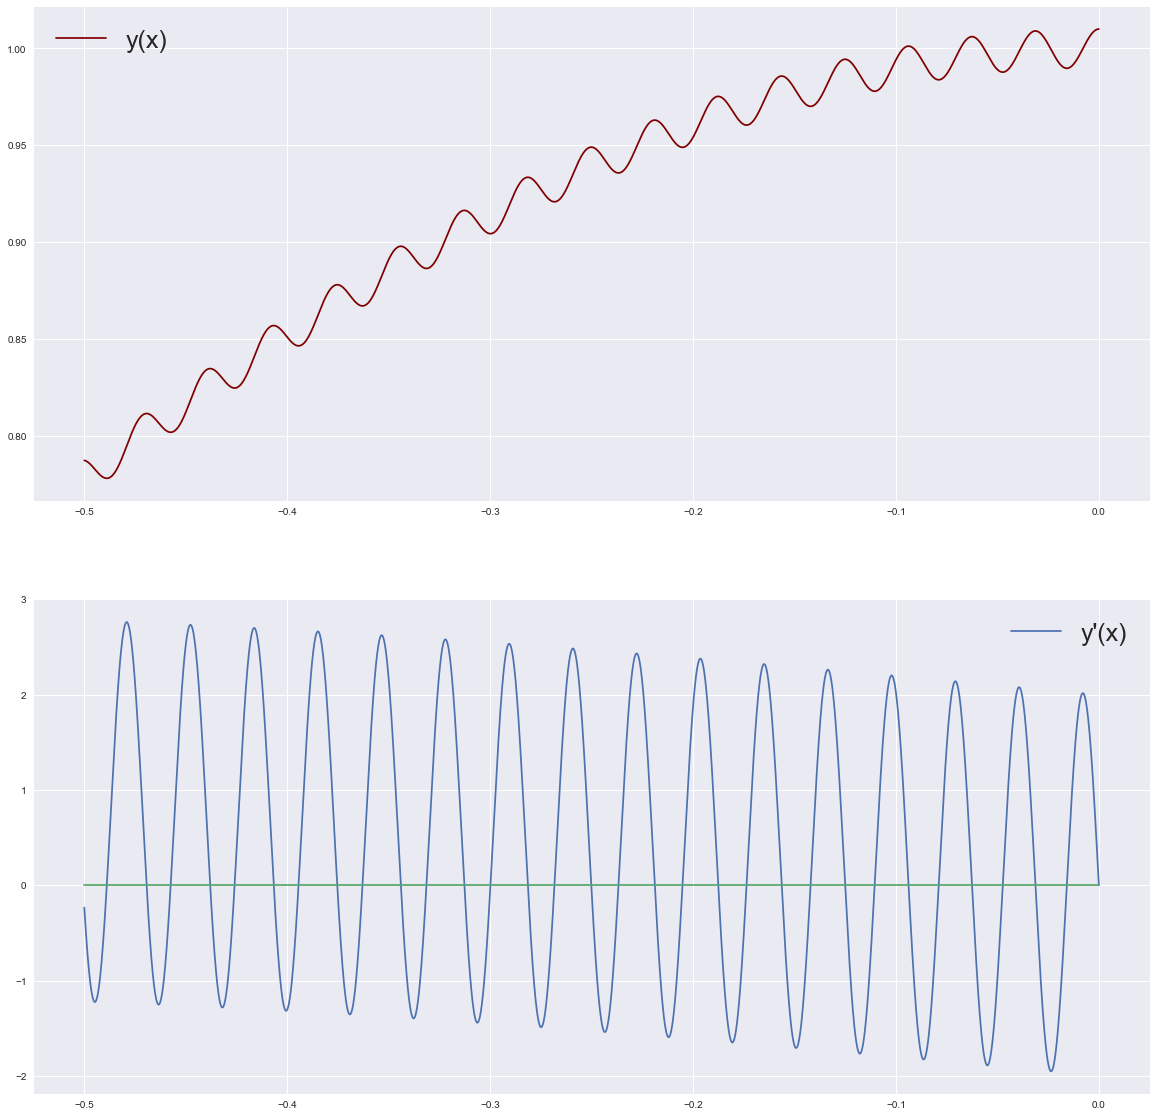

In [26]:
A2 = -0.5
B2 = 0

X = np.linspace(A2, B2, 10000)

fig, ax = plt.subplots(2, 1, figsize=(20, 20))

ax[0].plot(X, f2(X), label="y(x)", c='maroon')
ax[1].plot(X, df2(X), label="y'(x)")
ax[1].plot([A2, B2], [0, 0])

ax[0].legend(fontsize=25)
ax[1].legend(fontsize=25)

plt.show()

## Newton-Raphson method

In [28]:
def get_separeted_roots(f, a, b, n=50):
    """Returns the intervals at the ends of which 
    the function has different signs
    """
    sep_roots = []
    roots = [(x, f(x)) for x in np.linspace(a, b, n)]
    temp = roots[0]
    for key, value in roots[1:]:
        if(temp[1]*value < 0):
            sep_roots.append((temp[0], key))
        temp = key, value
    return sep_roots

def newton(f, x0, df, tol=1e-5):
    """Return the root of function using Newton method"""  
    x = x0 - f(x0)/df(x0)
    while np.abs(x - x0) > tol:
        x0 = x
        x -= f(x)/df(x)        
    return x

def newton_raphson(f, df, d2f, a, b, n=50):
    """Return the minimum point, minimum, 
    maximum point and maximum
    of the function on the segment [a, b]
    using Newton-Raphson method
    """    
    roots = [a, b]
    for _, x_right in get_separeted_roots(df, a, b, n):
        x = newton(df, x_right, d2f)
        if A2 <= x <= B2:
            roots.append(x)
    roots = np.array(roots)
    fr = f(roots)
    return (roots[fr.argmin()], fr.min()), (roots[fr.argmax()], fr.max())

### Minimum and maximum

In [29]:
(xmin, fmin), (xmax, fmax) = newton_raphson(f2, df2, d2f2, A2, B2)
print(f"Minimum point: {xmin}")
print(f"Minimum: {fmin}")
print(f"Maximum point: {xmax}")
print(f"Maximum: {fmax}")

Minimum point: -0.4889227245646587
Minimum: 0.7781498093296835
Maximum point: 0.0
Maximum: 1.01


# Task 3
### $z(x, y) = \cos{x}\cdot\cos{y}\cdot{e}\cdot((x-\pi)^2 + (y-\pi)^2)\\ 
    -5 \leq x \leq 5\\
    -5 \leq y \leq 5$


In [56]:
z = sp.cos(x) * sp.cos(y) * np.e * ((x-np.pi)**2 + (y-np.pi)**2)
f3 = sp.lambdify((x, y), z, np)

## Extremes

In [45]:
def gradient(f):
    """Return the function that computes 
    the gradient of the given function
    """
    df_dx = f.diff(x)
    df_dy = f.diff(y)
    
    def result(xv, yv):
        """Return the gradient of the function at the given point"""
        s = {"subs": {x: xv, y: yv}}  
        return np.array([df_dx.evalf(**s), 
                         df_dy.evalf(**s)]).astype(np.float)
    return result

def hessian_matrix(f):
    """Return the function that computes 
    the hessian matrix of the given function
    """
    hesse = hessian(f, (x, y))
    
    def result(xv, yv):
        """Return the hessian matrix of the function at the given point"""
        s = {"subs": {x: xv, y: yv}}    
        return np.matrix(hesse.evalf(**s)).astype(np.float)
    return result
    
def get_extremes(f, x0, y0, tol=1e-4, maxiter=100):
    """Return the extremum point of the function 
    and all intermediate values (for plotting)
    using the Newton method
    """
    grad = gradient(f)
    hesse = hessian_matrix(f)
    
    X = x0, y0
    Xs = [X]
    for i in range(maxiter):
        X_prev = X
        h = hesse(*X).I
        g = grad(*X) 
        X = (X - h@g).A1
        Xs.append(X)
        if lin.norm(np.abs(X - X_prev)) < tol:
            return X, np.array(Xs)
    return X, np.array(Xs)

In [58]:
XY = [(-2.9, -4),
      (0, -3),
      (0, -0.1),
      (3.5, -4),
     ]
extremes = [get_extremes(z, *xy) for xy in XY]
       
for extremum_point, _ in extremes:    
    print(f"Extremum point: {extremum_point}, Extremum: {f3(*extremum_point)}")

Extremum point: [-3.29570553 -3.29570553], Extremum: 219.97625666358056
Extremum point: [-0.12206223 -3.38205472], Extremum: -139.43147444546202
Extremum point: [-0.28402581 -0.28402581], Extremum: 58.78766370258278
Extremum point: [ 3.14159265 -3.43674108], Extremum: 112.5456809411411


## Surface graph

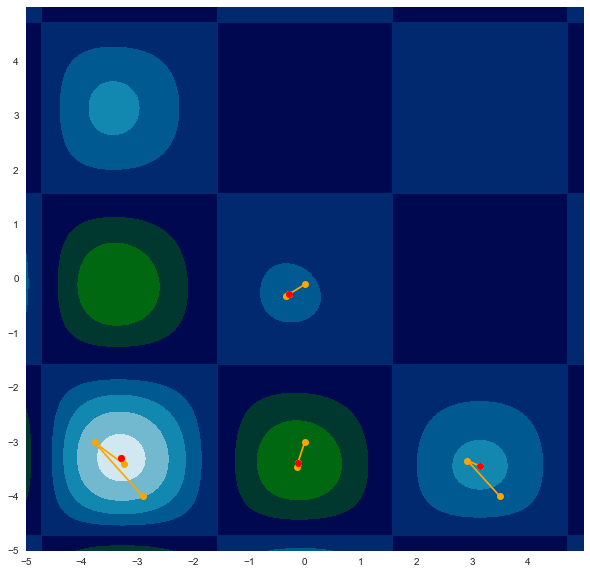

In [59]:
LIM = 5

X = np.linspace(-LIM, LIM, 1000)
Y = np.linspace(-LIM, LIM, 1000)
X, Y = np.meshgrid(X, Y)
Z = f3(X, Y)

plt.contourf(X, Y, Z, cmap=cm.ocean)

for extremum_point, temp_extremes in extremes:
    plt.plot(temp_extremes[:, 0], temp_extremes[:, 1], '-o', c='orange')
    plt.plot(*extremum_point, 'ro')

plt.xticks(np.arange(-LIM, LIM, 1))
plt.yticks(np.arange(-LIM, LIM, 1))

plt.show()

## 3d graph

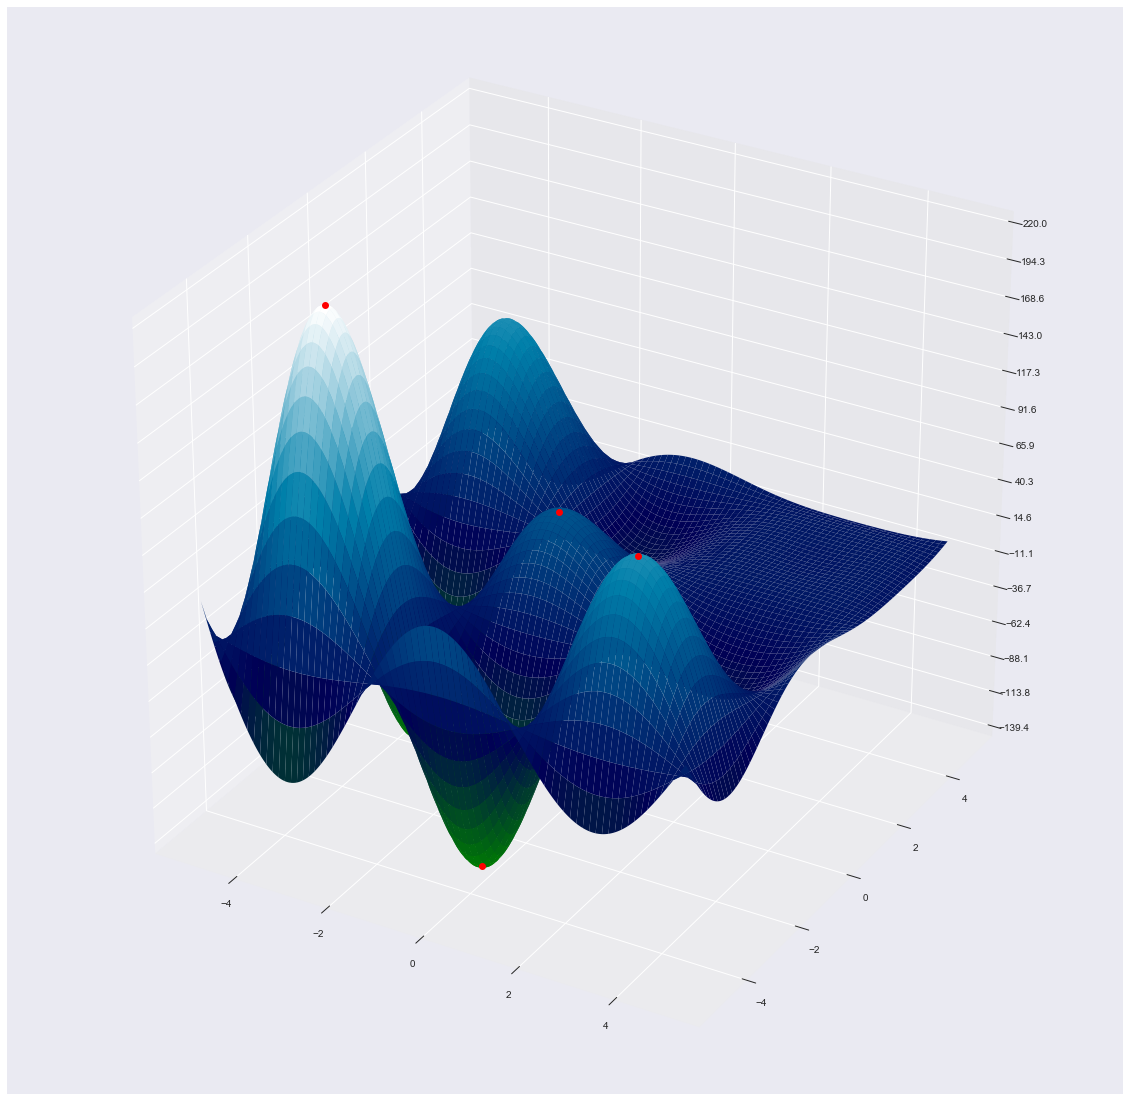

In [60]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.ocean, rcount=80, ccount=80)

for extremum_point, _ in extremes:    
    ax.plot([extremum_point[0]], [extremum_point[1]], f3(*extremum_point), 'ro')

ax.zaxis.set_major_locator(LinearLocator(15))